In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def P(x):
    #return (np.sin(x) + 0.5*np.sin(2*x) + 0.2*sin(5*x)+ 0.1*sin(9*x))
    return x

In [4]:
def auto_correlation(a,tau):
    auto_corr = []
    shift_ = 1
    for i in range(tau):
        shift_+=1
        self_ = a[:-shift_]
        shift = a[shift_:]
        auto_corr.append((np.mean(self_*shift) - np.mean(self_)*np.mean(shift))/(np.std(self_)*np.std(shift)))
    return auto_corr

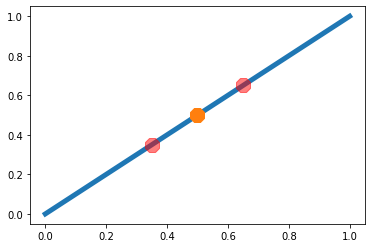

In [5]:
x = np.linspace(0,1,100)
y = P(x)
plt.plot(x,y,linewidth=5)
plt.plot([0.5],[0.5],'8',markersize=15)
plt.plot([0.65],[0.65],'8r',markersize=15,alpha=0.5)
plt.plot([0.35],[0.35],'8r',markersize=15,alpha=0.5)

In [6]:
#x = np.random.random()*3.14
x=0.5
i = x
rand = []
delta = 0.3
all_counter = 0
accept_counter= 0
rate = []

In [7]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%1
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< P(j)/P(i) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

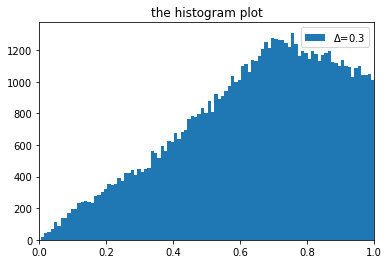

In [8]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,1])
plt.legend()

Text(0.5, 1.0, 'acceptance rate')

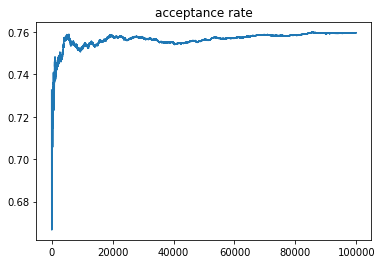

In [9]:
plt.plot(rate[100:])
plt.title('acceptance rate')

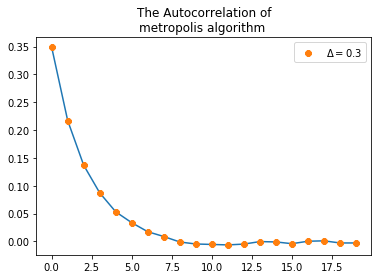

In [10]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

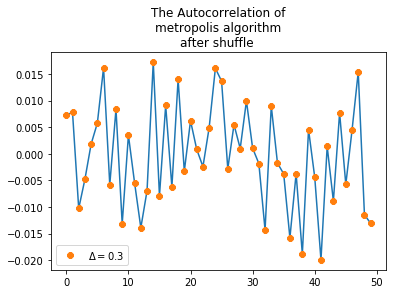

In [11]:
ind = np.random.randint(len(rand),size=10000)
rand_ = np.array(rand)[ind]
plt.plot(auto_correlation(np.array(rand_),50))
plt.plot(auto_correlation(np.array(rand_),50),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm\nafter shuffle ')
plt.legend()


## Guassian Random Generator

In [12]:
def P(x,sigma,mu):
    return (1/(2*np.pi)**0.5/sigma)*np.exp(-(x-mu)**2)/2/sigma**2

Text(0.5, 1.0, 'Guassian function')

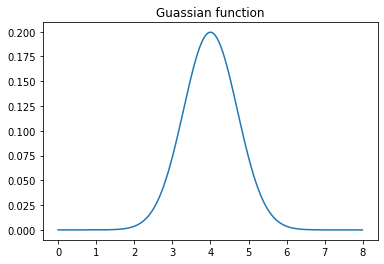

In [13]:
x = np.arange(0,8,0.01)
y = P(x,1,4)
plt.plot(x,y)
plt.title('Guassian function')

In [14]:
#x = np.random.random()*3.14
x=4
i = x
rand = []
delta = 7.3
all_counter = 0
accept_counter= 0
rate = []

In [15]:
for iter_ in range(100000):
    all_counter+=1
    j = (i + (np.random.random()*2-1)*delta)%8
    #j = np.random.random()
    rand_ = np.random.random()
    if rand_< np.abs(P(j,1,4)/P(i,1,4)) :
        accept_counter+=1
        rand.append(j)
        i=j
    rate.append(accept_counter/all_counter)

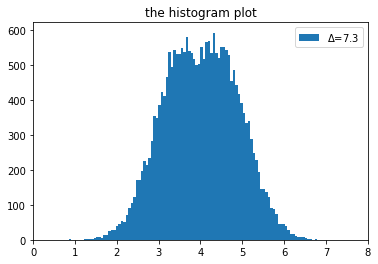

In [16]:
a,b,c = plt.hist(rand,bins=100,label = '$\Delta$={}'.format(delta))
plt.title('the histogram plot')
plt.xlim([0,8])
plt.legend()

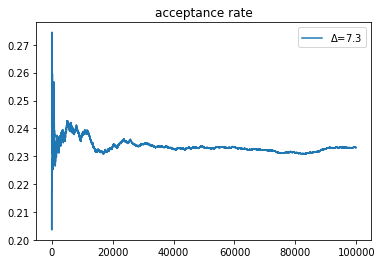

In [17]:
plt.plot(rate[100:],label = '$\Delta$={}'.format(delta))
plt.title('acceptance rate')
plt.legend()

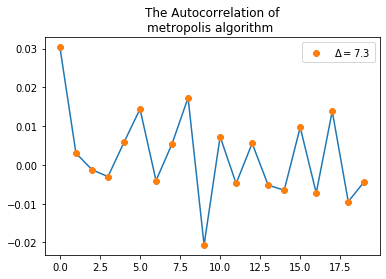

In [18]:
plt.plot(auto_correlation(np.array(rand),20))
plt.plot(auto_correlation(np.array(rand),20),'8',label='$\Delta={}$'.format(delta))
plt.title('The Autocorrelation of\nmetropolis algorithm ')
plt.legend()

# ISING MODEL


In [90]:
def lattice_gen(L):
    lattice = np.random.random((L,L))
    lattice[lattice>0.5]=1
    lattice[lattice<0.5]=-1
    return lattice

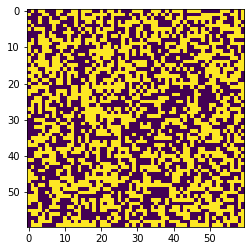

In [223]:
L = 60
J=3
lattice = lattice_gen(L)
plt.imshow(lattice)

In [237]:
KT_list = [100,10,1,0.1,0.01]
M_list = []

In [238]:
for kbt in KT_list:
    for scan in range(L**3):
        i,j=np.random.randint(L,size=2)
        #lattice[i,j]*=-1
        dE = 2*J*lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
        rand = np.random.random()
        if rand < np.exp(-kbt*dE):
            lattice[i,j]*=-1

    M_list.append((1/kbt,lattice.sum()/L**2))

In [251]:
for scan in range(L**3):
    i,j=np.random.randint(L,size=2)
    #lattice[i,j]*=-1
    dE = 2*J*lattice[i,j]*(lattice[(i-1)%L,j]+lattice[(i+1)%L,j]+lattice[i,(j-1)%L]+lattice[i,(j+1)%L])
    rand = np.random.random()
    if rand < np.exp(-0.1*dE):
        lattice[i,j]*=-1

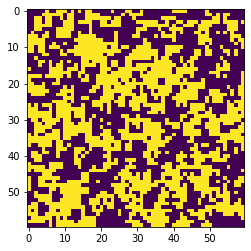

In [252]:
plt.imshow(lattice)

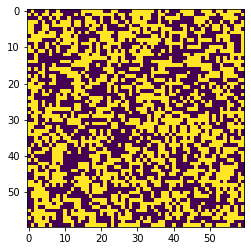

In [239]:
plt.imshow(lattice)

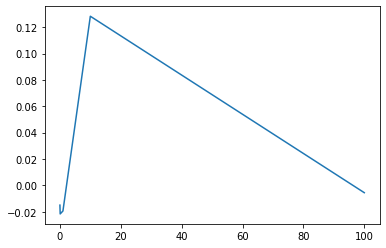

In [241]:
M_list = np.array(M_list)
plt.plot(M_list[:,0],M_list[:,1])

In [233]:
M_list

[(0.1, 0.6355555555555555),
 (0.2, 0.9072222222222223),
 (1.0, 1.0),
 (10.0, 0.034444444444444444),
 (1000.0, 0.005)]

In [64]:
i

519

In [65]:
j

199